In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'data\abn_data_1.csv')
df.head()                

,a,b,c,d,e,f,g,h,i,k,outlier
0,0.435518,0.038492,0.551343,0.140049,0.899545,0.588684,0.299706,0.245713,0.367375,0.452970,no
1,0.633197,0.034490,0.319406,0.879141,0.163079,0.184356,0.160583,0.104973,0.294980,0.429709,no
2,0.421558,0.299824,0.602220,0.521654,0.954621,0.547448,0.882898,0.586641,0.840204,0.212529,no
3,0.817491,0.647528,0.046214,0.487270,0.053872,0.817499,0.390589,0.394750,0.736854,0.442689,yes
4,0.291513,0.474018,0.065267,0.410573,0.903696,0.466520,0.196878,0.165370,0.297764,0.467911,no


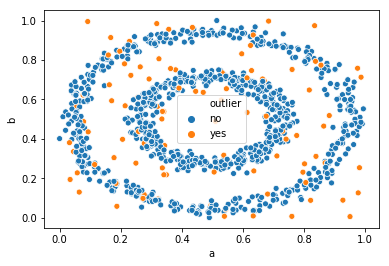

In [8]:
sns.scatterplot(df['a'], df['b'], hue = df['outlier'])

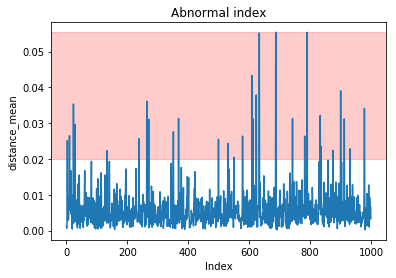

In [60]:
# unsupervised approach
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=2).fit(df[['a', 'b']])

# get distance for each point in training data its nearest neighbours
# for outliers the distances will be usually high
distance, index = knn.kneighbors(df[['a', 'b']])
df['outlier_prediction'] = distance.mean(axis = 1)
plt.title("Abnormal index")
plt.plot(df['outlier_prediction'])
plt.xlabel("Index"); plt.ylabel('distance_mean')
plt.axhspan(0.02, max(df['outlier_prediction']), alpha = 0.2, color = 'red')

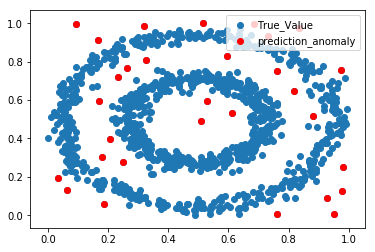

In [50]:
abnormal_index = np.where(distance.mean(axis = 1) > 0.02)[0]
plt.scatter(df['a'], df['b'], label = 'True_Value')
plt.scatter(df['a'][abnormal_index], df['b'][abnormal_index], color = 'red', label = 'prediction_anomaly')
plt.legend()

## Summary

* Unsupervised approach to Anomaly detection
* Deciding number of clusters is unknown, it can be ambigous and model can exhibit different behavior
* If 4 points are totally outside compared with rest all, choosing two neighbours will not show any outliers!
* They are computationally intensive as we need to calculate distances for each data points
    * Few approximations are available though (splitting data and calc distance to split medians)